<center>
    
# Introducción al Machine Learning 2020

Basado en material de  [Sebastian Rashka](https://sebastianraschka.com/). Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/) y José Robledo. Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

# Topico 2. Visualización

## Grupo de datos de prueba Fisher's Iris 

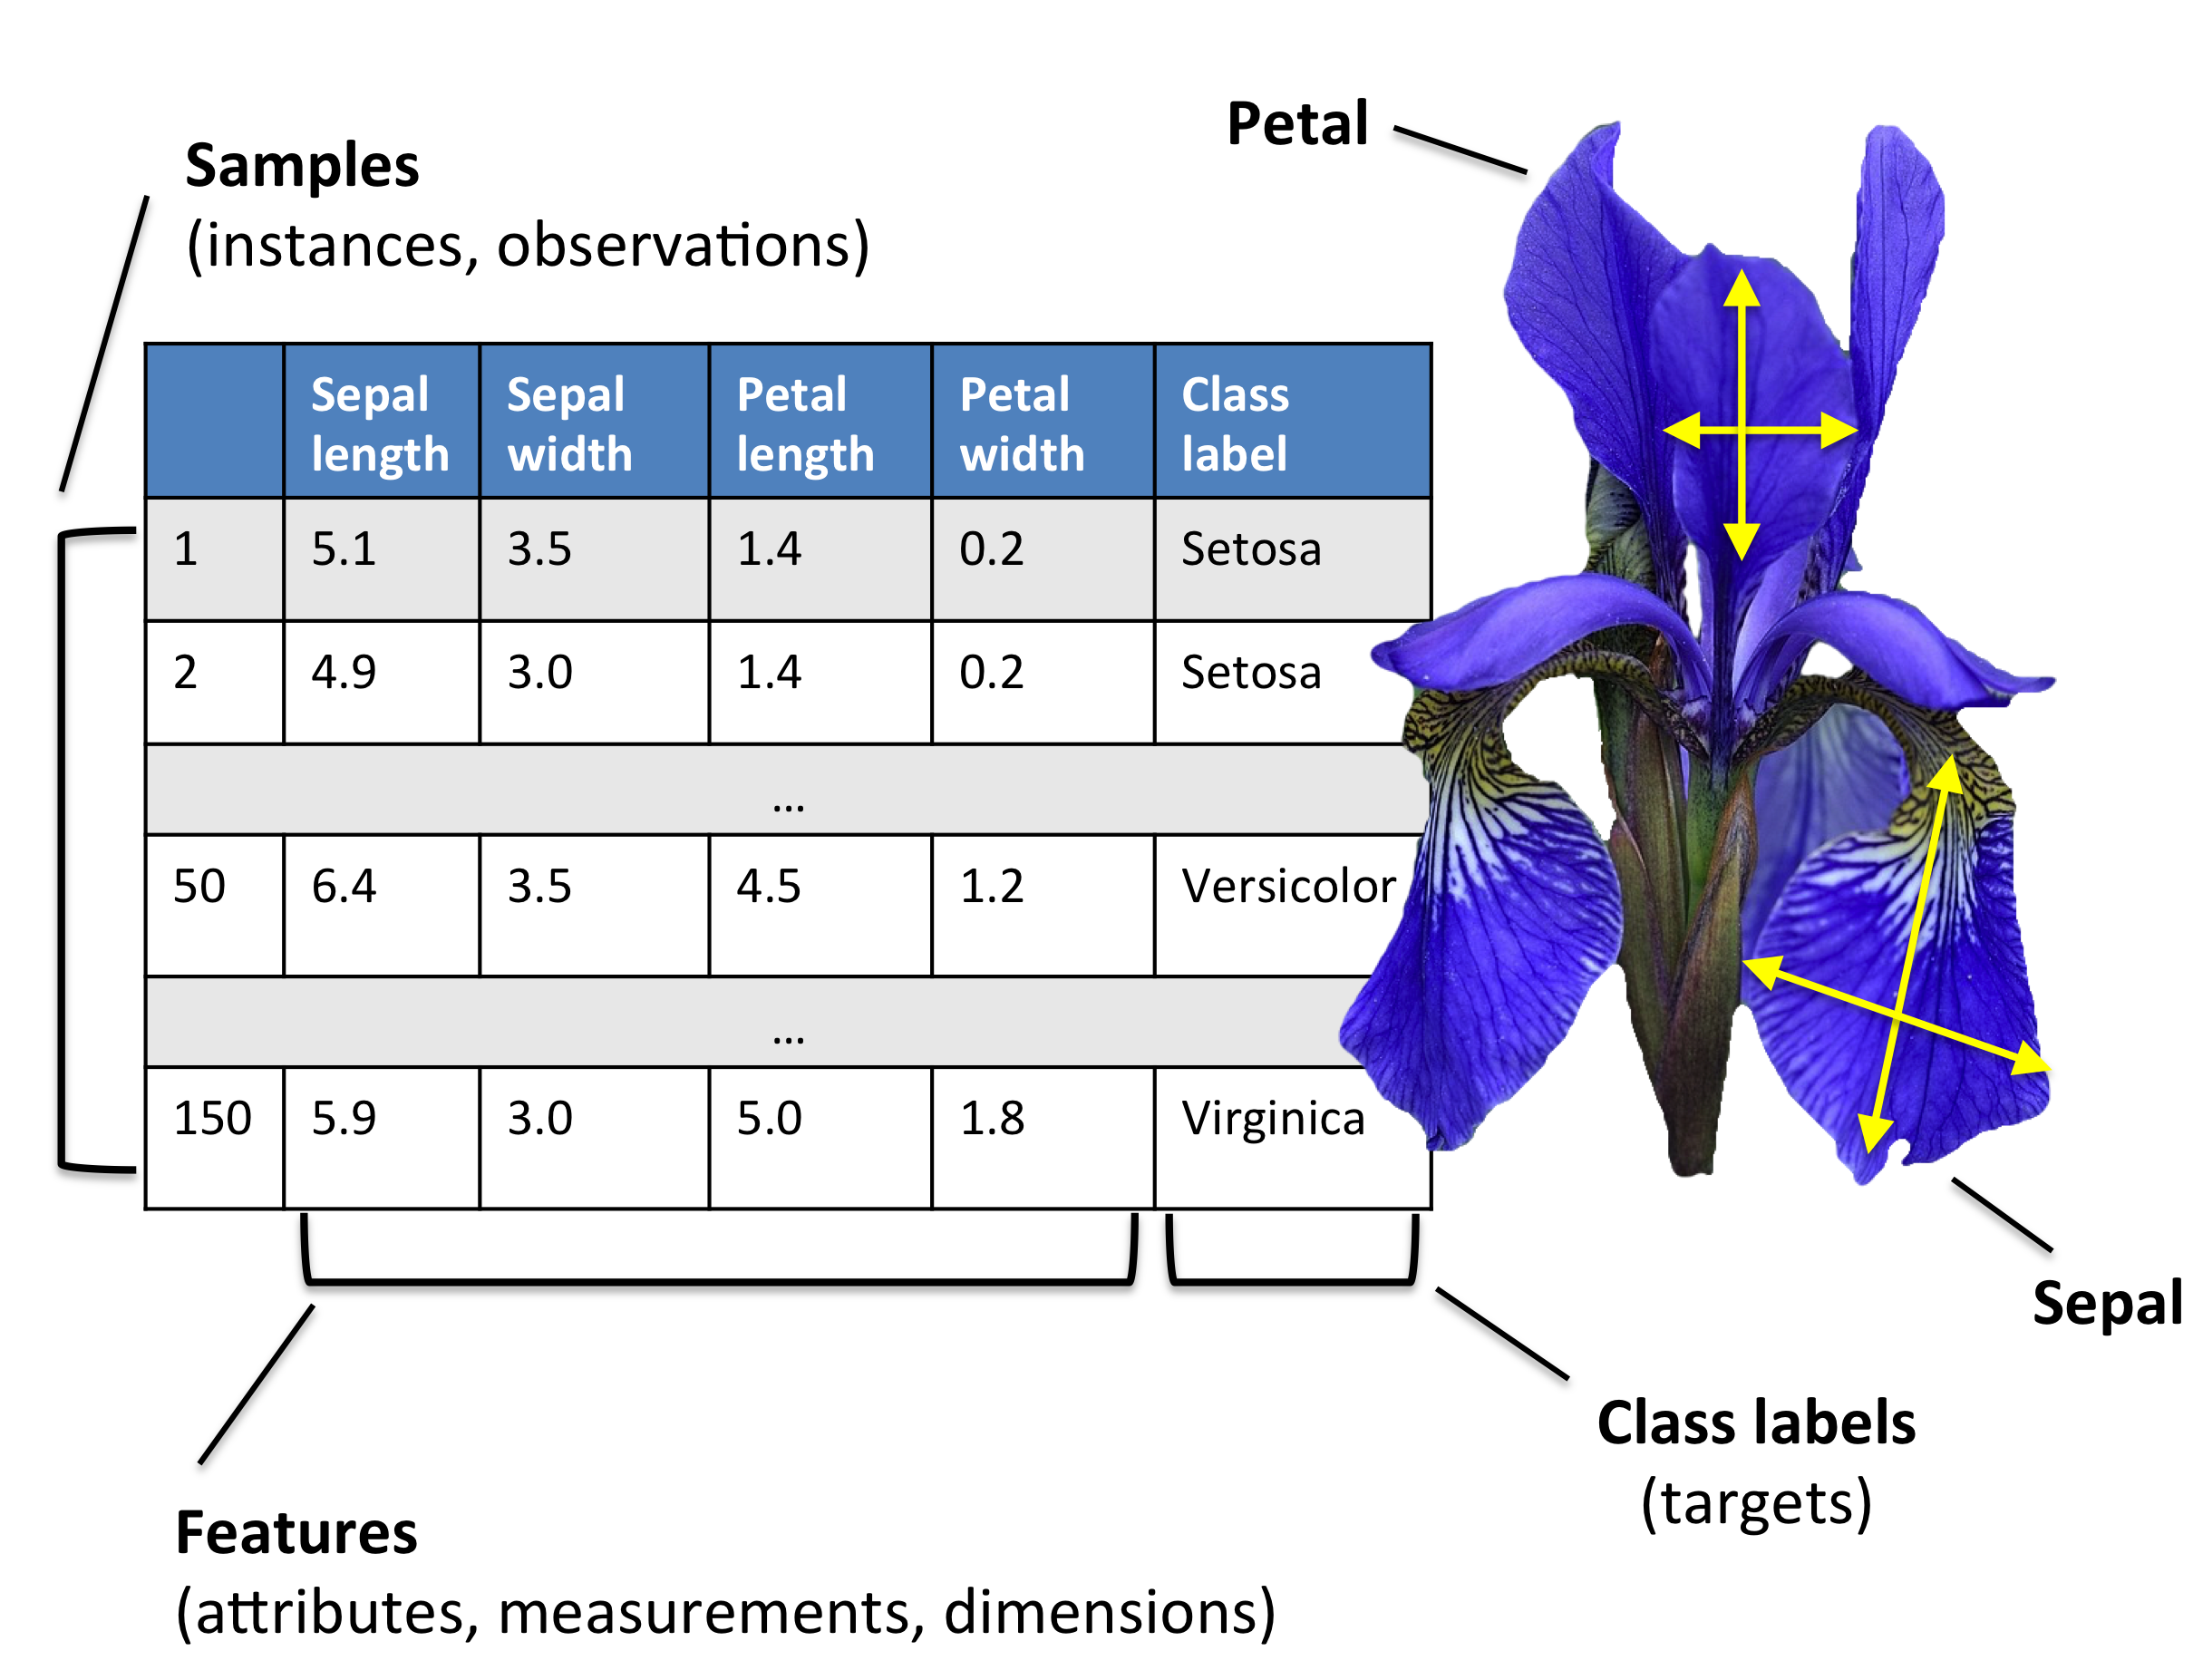

In [1]:
from IPython.display import Image
Image('./images/01_08.png',width=500) 

Iris esta guardado en diversos formatos, en varias databases. No ocurre lo mismo con otros grupos de datos. 
Por ejemplo, sklearn levanta iris como un objeto tipo bunch, 

In [2]:
#Imports que SIEMPRE usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Traemos los datos
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
type(load_iris())

sklearn.utils.Bunch

In [4]:
dir(load_iris())

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

Código para transformarlo en un data frame 

In [5]:
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
data = pd.DataFrame(data= np.c_[iris['data'],
                                 iris['target']],
                     columns= iris['feature_names'] + ['target']
                     )
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

## Matplotlib

A continuación usaremos el paquete que más se suele utilizar que es `matplotlib`. Al comienzo puede parecer el más difícil y engorroso, pero es uno de los paquetes más versátiles, que permiten la personalización completa de cada gráfico. Sirve mucho para publicaciones científicas.

En matplotlib debemos incluir por cada figura una declaración del comienzo de la misma, el contenido, el formato y finalmente el cierre y la visualización de la figura.

Usaremos dos métodos: `plot()` y `scatter()`, logrando lo mismo con ambos:

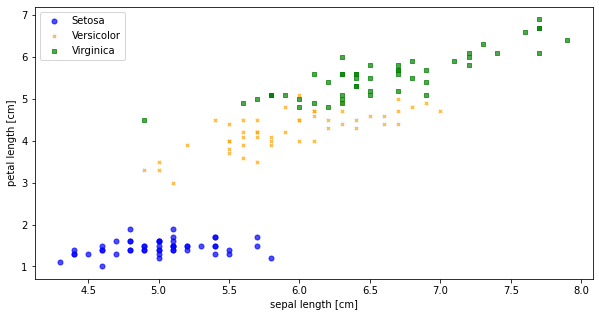

In [6]:
#Declaración del comienzo de la figura y su tamaño
plt.figure(figsize=(10,5))

#graficamos los datos de setosa
plt.plot(data.iloc[:50,0],
         data.iloc[:50,2],
         'o',
         ms=5,
         color='blue',
         label='Setosa',
         alpha=0.7)

#graficamos los datos de vversicolor
plt.scatter(x=data.iloc[50:100,0],
            y=data.iloc[50:100,2],
            color='orange',
            marker='x',
            s=10,
            label='Versicolor',
            alpha=0.7)

#graficamos los datos de virginica
plt.scatter(x=data.iloc[100:150,0],
            y=data.iloc[100:150,2],
            color='green',
            marker='s',
            s=10,
            label='Virginica',
            alpha=0.7)

#agregamos algo de formato al gráfico
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#cerramos el gráfico y mostramos
plt.show()

Con Matplotlib también se pueden hacer gráficos de [torta](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html), de [barras](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html), [histogramas](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), [boxplots](https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py), [gráficos de contorno](https://matplotlib.org/stable/api/contour_api.html?highlight=contour#module-matplotlib.contour), [gráficos 3D](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html?highlight=scatter3d), entre tantas otras opciones.

También resulta posible introducir dos gráficos dentro de una misma figura. Para esto utilizaremos `plt.subplot()`. Existen diversas maneras de hacer esto, yo les voy a mostrar una sola. Vamos a ver agregar un histograma como segundo gráfico:

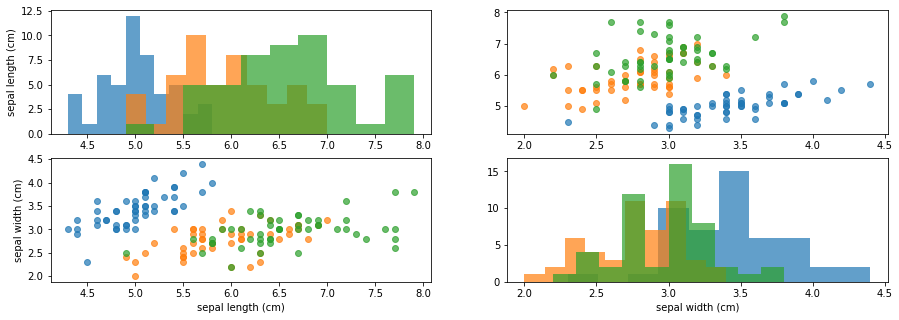

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
for i in data.target.unique():
    plt.hist(data['sepal length (cm)'][data.target==i],
             bins=10,
             alpha=0.7)
plt.ylabel('sepal length (cm)')

plt.subplot(2,2,2)
for i in data.target.unique():
    plt.plot(data['sepal width (cm)'][data.target==i],
            data['sepal length (cm)'][data.target==i],
            'o',
            alpha=0.7)

plt.subplot(2,2,3)
for i in data.target.unique():
    plt.plot(data['sepal length (cm)'][data.target==i],
            data['sepal width (cm)'][data.target==i],
            'o',
            alpha=0.7)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.subplot(2,2,4)
for i in data.target.unique():
    plt.hist(data['sepal width (cm)'][data.target==i],
             bins=10,
             alpha=0.7)
plt.xlabel('sepal width (cm)')

plt.show()



Ejemplo de Gráfico de torta:

Queremos armar un gráfico de torta utilizando matplotlib que muestre la proporción de plantas que tienen la longitud del sépalo menor a 6 centímetros para cada especie.

Primero armamos un dataframe que lo resuma:

In [8]:
caso1 = data[data['sepal length (cm)']<6]['target'].value_counts()
caso1

0.0    50
1.0    26
2.0     7
Name: target, dtype: int64

Y luego utilizamos ese dataframe para armar el gráfico de torta. 

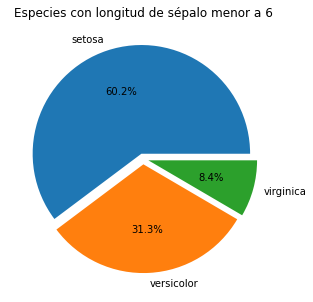

In [9]:
plt.figure(figsize=(7,5))

plt.title('Especies con longitud de sépalo menor a 6')
plt.pie(caso1,
        labels=iris.target_names,
        autopct='%1.1f%%',
        explode=(0.05,0.05,0.05))
plt.show()

## Seaborn
[Seaborn](https://seaborn.pydata.org/examples/index.html) es otro paquete de gráfico. Tambien tiene el archivo iris como un dataframe, pues necesita daframes para plotear, pero tiene distintas las etiquetas con respecto a sklearn dataset iris.

In [6]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Primero haremos un gráfico de dispersión similar al que hicimos en matplotlib, utilizando [`sns.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot). Veamos que es mucho más sencillo.

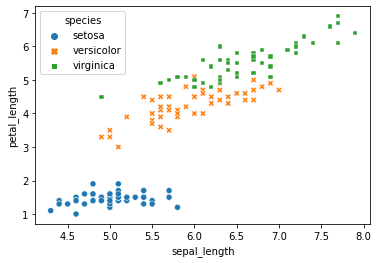

In [7]:
sns.scatterplot(data = iris, 
                x= 'sepal_length',
                y= 'petal_length',
                hue='species',
                style='species')
plt.show()

Existen diversos tipos de gráficos ya predefinidos que uno puede tunear. A continuación les mostramos algunos. 

El pairplot sirve para ver los gráficos de dispersión de a pares en las variables numéricas. En las diagonales, se muestran el o los histogramas correspondientes. La variable "hue" permite separar el conjunto de datos en base a alguna variable categórica, como la especie:"species". Si no se explicita qué poner en la diagonal con "diag_kind", seaborn por default grafica la estimación de densidad de kernel de cada histograma.

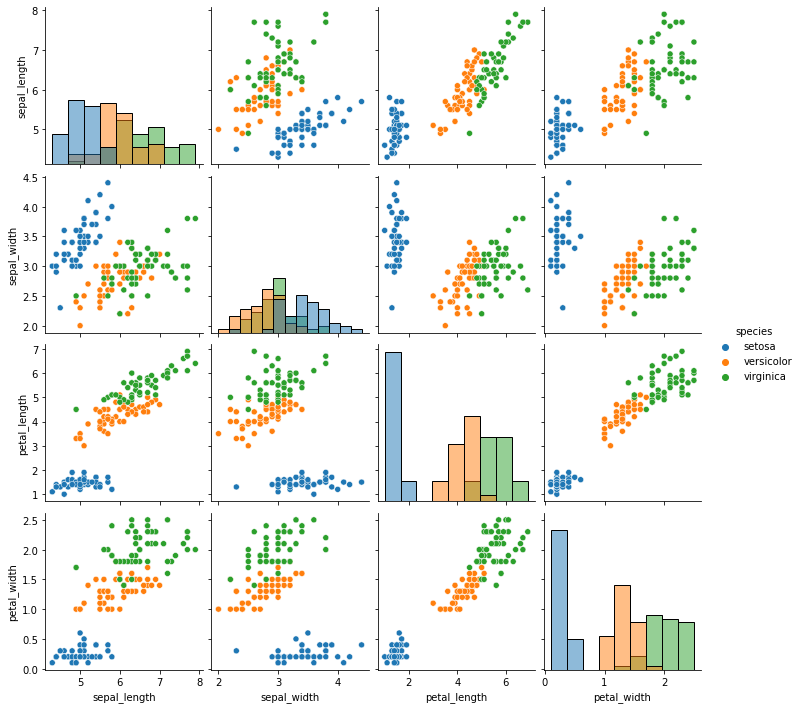

In [8]:
sns.pairplot(iris, hue="species",diag_kind = "hist")
plt.show()

Podemos hacer gráficos de barra con seabron utilizando el método `countplot()`. A continuación va un ejemplo, donde acotamos el conjunto de datos a sólo aquellas plantas que tienen la longitud del sépalo menor o igual a 6.

<AxesSubplot:xlabel='species', ylabel='count'>

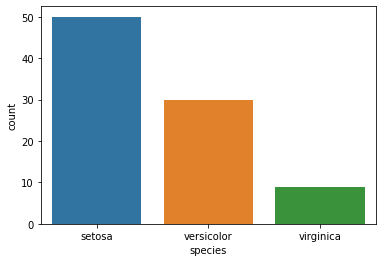

In [13]:
sns.countplot(x=iris[iris.sepal_length<=6]['species'])

Existen otros métodos interesantes, como los `lmplot()`, que realizan un gráfico de dispersión y además ajustan un modelo lineal, incluyendo las bandas de confianza:

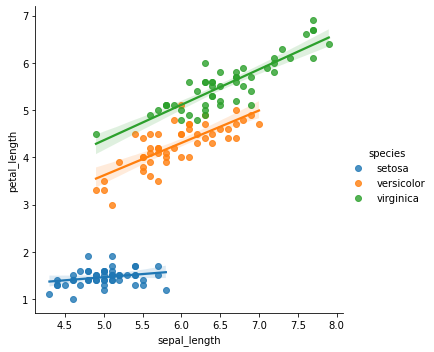

In [14]:
sns.lmplot(data=iris,x='sepal_length',y='petal_length',hue='species')
plt.show()